In [3]:
import pandas as pd

# Load IoT sensor data from CSV (Generated in Homework 1)
df = pd.read_csv("IoT_Data_Simulation_Homework.csv")

# Display the first few rows
print(df.head())

    Sensor ID                                     Location  Temperature (°C)  \
0     Arm_968  Haleyberg, Saint Vincent and the Grenadines             32.88   
1   Serve_918                          Lopezland, Cambodia             30.65   
2   Every_472                        Theodorebury, Eritrea             25.67   
3  Forget_663                     New Clarence, Cape Verde             30.05   
4    Safe_507                       East Justinmouth, Oman             25.26   

   Humidity (%)  Air Quality Index (AQI)            Timestamp  soil_moisture  \
0            49                      179  2025-05-10 00:27:50             16   
1            77                       75  2025-05-10 00:27:51             27   
2            41                      170  2025-05-10 00:27:52             22   
3            47                       72  2025-05-10 00:27:53             26   
4            78                      176  2025-05-10 00:27:54             25   

   pm25  pm10        o3   no2  so2    

In [4]:
from web3 import Web3

ganache_url = "http://127.0.0.1:7545"  # Change port if necessary
web3 = Web3(Web3.HTTPProvider(ganache_url))

if web3.is_connected():
    print("✅ Connected to Ganache successfully!")
else:
    print("❌ Connection failed. Ensure Ganache is running.")

✅ Connected to Ganache successfully!


In [5]:
import json

contract_address = "0xEAE35bBDf21Ee0DD03c72451814cdF451cD97327"

with open('abi.json') as f:
	abi = json.load(f)  # Replace with actual ABI JSON list

# Load the smart contract
contract = web3.eth.contract(address=contract_address, abi=abi)

# Set the default sender address (first account from Ganache)
web3.eth.default_account = web3.eth.accounts[0]


print(f"✅ Connected to Smart Contract at {contract_address}")

✅ Connected to Smart Contract at 0xEAE35bBDf21Ee0DD03c72451814cdF451cD97327


In [6]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

Total Records: 0


In [ ]:
# txn = contract.functions.storeData("TEST001", "Temperature", "22.5°C").transact({
#     'from': web3.eth.default_account,
#     'gas': 1000000
# })
# web3.eth.wait_for_transaction_receipt(txn)
# print("✅ Dummy data stored on blockchain!")

✅ Dummy data stored on blockchain!


In [8]:
total_records = contract.functions.getTotalRecords().call()
print(f"Total Records: {total_records}")

record = contract.functions.getRecord(0).call()
print("First Stored Record:", record)

Total Records: 1
First Stored Record: [1749720509, 'TEST001', 'Temperature', '22.5°C']


In [9]:
import time

def send_iot_data(device_id, data_type, data_value):
    txn = contract.functions.storeData(device_id, data_type, data_value).transact({
        'from': web3.eth.default_account,
        'gas': 3000000
    })
    receipt = web3.eth.wait_for_transaction_receipt(txn)
    print(f"✅ Data Stored: {data_type} - {data_value}, Txn Hash: {receipt.transactionHash.hex()}")

In [10]:
sensor_fields = [
    'Temperature (°C)', 'Humidity (%)', 'Air Quality Index (AQI)',
    'soil_moisture', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co',
    'water_quality', 'ph', 'turbidity', 'contamination'
]

# Only send the first 50 rows for testing
for i, row in enumerate(df.iterrows()):
    if i >= 50:
        break
    row = row[1]
    sensor_id = str(row["Sensor ID"])
    for field in sensor_fields:
        try:
            data_value = str(row[field])
            send_iot_data(sensor_id, field, data_value)
            time.sleep(1)
        except Exception as e:
            print(f"❌ Error sending {field} for {sensor_id}: {e}")

✅ Data Stored: Temperature (°C) - 32.88, Txn Hash: 788b14fec1a5ea634631a2c21d06c418ab5d440375027a4df56bb1778420a015
✅ Data Stored: Humidity (%) - 49, Txn Hash: 946cad1210a882bf16a31698f993122b79c44dc2cffc41ed5556da30ecc30222
✅ Data Stored: Air Quality Index (AQI) - 179, Txn Hash: ff4daa4a8719c1014e38f0c3487c5270e54ed63b6595099a7b9001d2d22dcec3
✅ Data Stored: soil_moisture - 16, Txn Hash: 36a5704572e93d2ee616e3c540e1680d5a45d6123afa6fadcde3288d917fc963
✅ Data Stored: pm25 - 479, Txn Hash: 0fa714baf8ebacc44c79e1c96f13019392c56590473daf0013a0462e1247ba20
✅ Data Stored: pm10 - 237, Txn Hash: 7f3826275b7ff8cdd255db7da18c7c0d5a46dc6d20c48fcf1ae8c254118919e7
✅ Data Stored: o3 - 0.1049158253256662, Txn Hash: b1d75bc7abc76c7b3b3f08bc29d13d7f969a288b9056a0d9059f2d3c5c74c62d
✅ Data Stored: no2 - 391, Txn Hash: 47fdc286e17ba908e9844906697686eb409bbfd133756f5208dcb308179cc378
✅ Data Stored: so2 - 537, Txn Hash: bd2492e9b5b2cd9e3fe426e1f2454095008883efa0d9e99b5f5be8173471cad7
✅ Data Stored: co - 43.

In [11]:
total_records = contract.functions.getTotalRecords().call()
print(f"📦 Total IoT records stored: {total_records}")

📦 Total IoT records stored: 701


In [12]:
if total_records > 0:
    record = contract.functions.getRecord(0).call()
    print("📝 First Stored Record:", record)

📝 First Stored Record: [1749720509, 'TEST001', 'Temperature', '22.5°C']


In [14]:
import pandas as pd

# Retrieve all IoT records
data = []
for i in range(total_records):
    record = contract.functions.getRecord(i).call()
    data.append({
        "timestamp": record[0],
        "device_id": record[1],
        "data_type": record[2],
        "data_value": record[3]
    })

# Convert to a DataFrame
df = pd.DataFrame(data)

# Convert timestamp to readable format
df["timestamp"] = pd.to_datetime(df["timestamp"], unit="s")

# Display first few records
print(df.head())

            timestamp device_id                data_type data_value
0 2025-06-12 09:28:29   TEST001              Temperature     22.5°C
1 2025-06-12 09:28:29   Arm_968         Temperature (°C)      32.88
2 2025-06-12 09:28:30   Arm_968             Humidity (%)         49
3 2025-06-12 09:28:31   Arm_968  Air Quality Index (AQI)        179
4 2025-06-12 09:28:32   Arm_968            soil_moisture         16


In [ ]:
import numpy as np

# Extract numeric values from 'data_value' where applicable
df["numeric_value"] = df["data_value"].str.extract(r'(\d+\.?\d*)').astype(float)

# Handle missing values (if any)
df.fillna(0, inplace=True)

# Display cleaned data
print(df.head())

            timestamp device_id                data_type data_value  \
0 2025-06-12 09:28:29   TEST001              Temperature     22.5°C   
1 2025-06-12 09:28:29   Arm_968         Temperature (°C)      32.88   
2 2025-06-12 09:28:30   Arm_968             Humidity (%)         49   
3 2025-06-12 09:28:31   Arm_968  Air Quality Index (AQI)        179   
4 2025-06-12 09:28:32   Arm_968            soil_moisture         16   

   numeric_value  
0          22.50  
1          32.88  
2          49.00  
3         179.00  
4          16.00  


In [16]:
# Save cleaned IoT data to a CSV file
df.to_csv("cleaned_iot_data.csv", index=False)

print("✅ Cleaned IoT data saved successfully as cleaned_iot_data.csv")

✅ Cleaned IoT data saved successfully as cleaned_iot_data.csv


In [18]:
import pandas as pd

# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")

# Display first few rows to verify data
print(df.head())

             timestamp device_id                data_type data_value  \
0  2025-06-12 09:28:29   TEST001              Temperature     22.5°C   
1  2025-06-12 09:28:29   Arm_968         Temperature (°C)      32.88   
2  2025-06-12 09:28:30   Arm_968             Humidity (%)         49   
3  2025-06-12 09:28:31   Arm_968  Air Quality Index (AQI)        179   
4  2025-06-12 09:28:32   Arm_968            soil_moisture         16   

   numeric_value  
0          22.50  
1          32.88  
2          49.00  
3         179.00  
4          16.00  


In [19]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

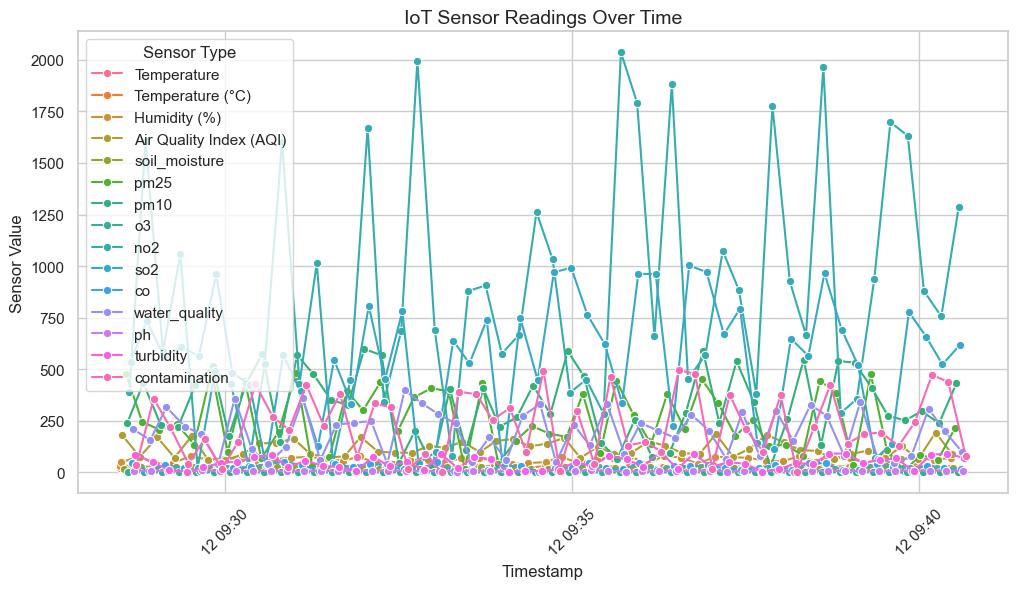

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))  # Adjust figure size
sns.lineplot(x=df["timestamp"], y=df["numeric_value"], hue=df["data_type"], marker="o")

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add title and labels
plt.title("IoT Sensor Readings Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)

# Show legend
plt.legend(title="Sensor Type")

# Display the plot
plt.show()

In [1]:
import pandas as pd


# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")


# Display first few rows to verify data
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'cleaned_iot_data.csv'

In [2]:
import pandas as pd


# Load cleaned IoT data
df = pd.read_csv("cleaned_iot_data.csv")


# Display first few rows to verify data
print(df.head())

             timestamp device_id                data_type data_value  \
0  2025-06-12 09:28:29   TEST001              Temperature     22.5°C   
1  2025-06-12 09:28:29   Arm_968         Temperature (°C)      32.88   
2  2025-06-12 09:28:30   Arm_968             Humidity (%)         49   
3  2025-06-12 09:28:31   Arm_968  Air Quality Index (AQI)        179   
4  2025-06-12 09:28:32   Arm_968            soil_moisture         16   

   numeric_value  
0          22.50  
1          32.88  
2          49.00  
3         179.00  
4          16.00  


In [3]:
# Convert timestamp column to datetime
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
sns.set(style="whitegrid")

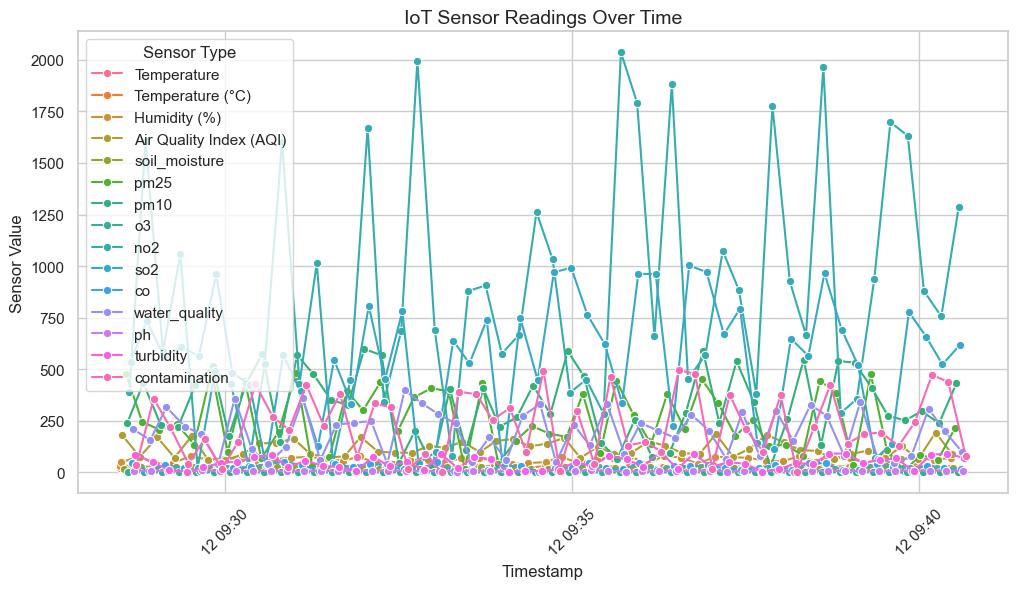

In [7]:
plt.figure(figsize=(12, 6))  # Adjust figure size
sns.lineplot(x=df["timestamp"], y=df["numeric_value"], hue=df["data_type"], marker="o")


# Rotate x-axis labels for better readability
plt.xticks(rotation=45)


# Add title and labels
plt.title("IoT Sensor Readings Over Time", fontsize=14)
plt.xlabel("Timestamp", fontsize=12)
plt.ylabel("Sensor Value", fontsize=12)


# Show legend
plt.legend(title="Sensor Type")


# Display the plot
plt.show()
